In [1]:
import sys
sys.path.append('../')
import os
os.environ['DATABASE_URL'] = DATABASE_URL = 'sqlite:////Users/nickhilton/kaggle/march_madness/databases/turtle.db'
DATABASE = os.environ['DATABASE_URL'].split('sqlite:///')[1]

import pandas as pd
from sqlalchemy import *
from sqlalchemy.orm import *
from sqlalchemy.orm import sessionmaker
from models import Match
from models import Team
from models import MatchPredictions
import matplotlib.pyplot as plt

In [2]:
engine = create_engine(DATABASE_URL)
Session = sessionmaker(bind=engine)

session = Session()

In [3]:
session.query(Team).first()

In [4]:
s = session.query(MatchPredictions).filter(MatchPredictions.season == 2010)

In [5]:
matches = session.query(Match).filter(Match.Season == 2011).all()

teams = []

for match in matches:
    teams.extend(match.teams)

teams = list(set(teams))
team_ids = [team.TeamID for team in teams]

In [6]:
matches = session.query(Match.mdid, Match.Season, Match.WScore, Match.LScore, 
              Match.stage, Match.WLoc, Match.NumOT).filter(Match.Season >= 2003).all()

df = pd.DataFrame(matches)

df['delta'] = df.WScore - df.LScore

df.loc[df['NumOT'] > 0, 'delta'] = 0

In [7]:
def calculate_distribution(results):
    delta_counts = results.groupby(by='delta').mdid.count()
    total = delta_counts.sum()
    densityf = delta_counts/total
    cumdf = densityf.cumsum()
    return cumdf

In [8]:
neutrals = (df.loc[df['WLoc'] == 'N',['delta','mdid']]).append(-df.loc[df['WLoc'] == 'N',['delta','mdid']])

homes = (df.loc[df['WLoc'] == 'H',['delta','mdid']]).append(-df.loc[df['WLoc'] == 'A',['delta','mdid']])

aways = -homes

/var/folders/gq/tlz5cgm962v1cwm9rwqbmht80000gp/T/ipykernel_44877/1064317663.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  neutrals = (df.loc[df['WLoc'] == 'N',['delta','mdid']]).append(-df.loc[df['WLoc'] == 'N',['delta','mdid']])
/var/folders/gq/tlz5cgm962v1cwm9rwqbmht80000gp/T/ipykernel_44877/1064317663.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  homes = (df.loc[df['WLoc'] == 'H',['delta','mdid']]).append(-df.loc[df['WLoc'] == 'A',['delta','mdid']])


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

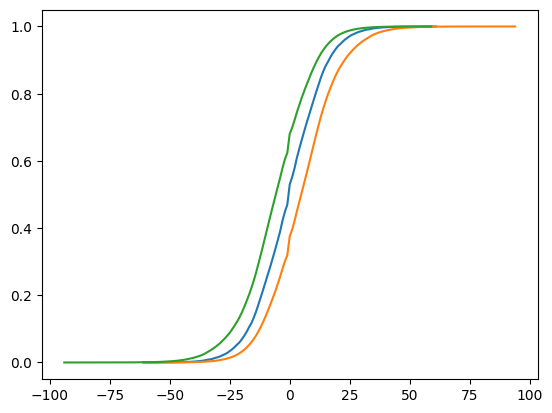

In [9]:
plt.plot(calculate_distribution(neutrals), label = 'neutral')
plt.plot(calculate_distribution(homes), label = 'home')
plt.plot(calculate_distribution(aways), label = 'away')
plt.grid(b='on')
plt.legend()

In [10]:
dist = calculate_distribution(homes)

In [11]:
def response_function(result, distribution):
    if result < distribution.index[0]:
        raise Exception
    if result in distribution:
        return distribution[result]
    else:
        return response_function(result-1, distribution)

In [12]:
fields = []

In [13]:
metrics = session.query(Match).options(load_only(*fields)).filter(Match.Season >= 2003).all()

In [14]:
m = session.query(Match).filter(Match.Season > 2010).first()

In [15]:
dir(m)

['DayNum',
 'Delta',
 'LAst',
 'LBlk',
 'LDR',
 'LFGA',
 'LFGA3',
 'LFGM',
 'LFGM3',
 'LFGP',
 'LFGP3',
 'LFGP3_avg',
 'LFGP_avg',
 'LFTA',
 'LFTM',
 'LOR',
 'LPF',
 'LR',
 'LR_avg',
 'LScore',
 'LStl',
 'LTO',
 'LTeamID',
 'NumOT',
 'Season',
 'WAst',
 'WBlk',
 'WDR',
 'WFGA',
 'WFGA3',
 'WFGM',
 'WFGM3',
 'WFGP',
 'WFGP3',
 'WFGP3_avg',
 'WFGP_avg',
 'WFTA',
 'WFTM',
 'WLoc',
 'WOR',
 'WPF',
 'WR',
 'WR_avg',
 'WScore',
 'WStl',
 'WTO',
 'WTeamID',
 '__abstract__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__mapper__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__table__',
 '__tablename__',
 '__weakref__',
 '_losing_seed',
 '_return_stats',
 '_sa_class_manager',
 '_sa_instance_state',
 '_sa_registry',
 '_winning_see

In [16]:
m.__getattribute__('id')

39849

In [ ]:
dir(m)